In [9]:
import sys
sys.path.append("../")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import plotly.express as px
import numpy as np
import swifter
import re
from src.utils.text_cleaner import remove_stopwords_punctuaction, replace_number_words_with_ordinals


pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid", palette="pastel", color_codes=True) 

In [2]:
df_test = pd.read_parquet('../data/properati_a_predecir.parquet', engine='pyarrow')

In [3]:
rename_cols = {
    "l1": "country",
    "l2": "province",
    "l3": "city_neighborhood",
    "l4": "published_neigborhood"
}
drop_cols = ['price', 'l5', 'l6']

In [4]:
df_test = df_test.drop(drop_cols, axis=1)
df_test = df_test.rename(rename_cols, axis=1)
df_test[["lat", "lon"]] = df_test[["lon", "lat"]]
df_test["title"] = df_test["title"].str.lower().str.strip().str.replace("  ", " ")
df_test["description"] = df_test["description"].str.lower().str.strip().str.replace("  ", " ")

In [5]:
df_test.head(2)

,ad_type,start_date,end_date,created_on,lat,lon,country,province,city_neighborhood,published_neigborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-34.573623,-58.442399,Argentina,Capital Federal,Colegiales,None,3.0,2.0,2.0,NaN,NaN,USD,None,"departamento en venta en belgrano, capital fed...","sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta
192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-34.606620,-58.430493,Argentina,Capital Federal,Almagro,None,3.0,2.0,2.0,77.0,67.0,USD,None,departamento de 3 ambientes en venta en almagro,excelente departamento de tres ambientes ampli...,Departamento,Venta


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 556713 to 757314
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ad_type                6000 non-null   object        
 1   start_date             6000 non-null   datetime64[ns]
 2   end_date               6000 non-null   object        
 3   created_on             6000 non-null   datetime64[ns]
 4   lat                    5545 non-null   float64       
 5   lon                    5544 non-null   float64       
 6   country                6000 non-null   object        
 7   province               6000 non-null   object        
 8   city_neighborhood      5789 non-null   object        
 9   published_neigborhood  459 non-null    object        
 10  rooms                  6000 non-null   float64       
 11  bedrooms               4935 non-null   float64       
 12  bathrooms              5782 non-null   float64       
 13  s

In [7]:
df_test.isna().sum() / len(df_test)

ad_type                  0.000000
start_date               0.000000
end_date                 0.000000
created_on               0.000000
lat                      0.075833
lon                      0.076000
country                  0.000000
province                 0.000000
city_neighborhood        0.035167
published_neigborhood    0.923500
rooms                    0.000000
bedrooms                 0.177500
bathrooms                0.036333
surface_total            0.204000
surface_covered          0.186833
currency                 0.000000
price_period             0.680833
title                    0.000000
description              0.000000
property_type            0.000000
operation_type           0.000000
dtype: float64

In [8]:
cat_cols = 'ad_type currency price_period property_type operation_type country province'.split()
num_cols = 'surface_total surface_covered bathrooms bedrooms'.split()

In [9]:
# potential usful cols: price_usd_per_m2 price_per_m2

In [71]:
df_test["title"] = df_test["title"].swifter.set_dask_scheduler('processes').set_npartitions(16).\
    allow_dask_on_strings(enable=True).\
        apply(remove_stopwords_punctuaction).\
            apply(replace_number_words_with_ordinals)

2023-05-29 11:01:46.615512: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:01:46.667822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:01:46.765818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

2023-05-29 11:02:01.097796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:02:01.285844: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:02:01.339614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [72]:
df_test["description"] = df_test["description"].swifter.set_dask_scheduler('processes').set_npartitions(16).\
    allow_dask_on_strings(enable=True).\
        apply(remove_stopwords_punctuaction).\
            apply(replace_number_words_with_ordinals)

2023-05-29 11:02:57.608180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:02:57.673464: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:02:57.865721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

2023-05-29 11:03:12.932731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:03:13.065420: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-29 11:03:13.371777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [73]:
df_test.head()

,ad_type,start_date,end_date,created_on,lat,lon,country,province,city_neighborhood,published_neigborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,Imputed_Neigborhood
id,,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-34.573623,-58.442399,Argentina,Capital Federal,Colegiales,None,3.0,2.0,2.0,NaN,NaN,USD,None,departamento venta belgrano capital federal,"sup escritura 96,47 m2 cubiertos 61 m2 descubi...",Departamento,Venta,Belgrano
192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-34.606620,-58.430493,Argentina,Capital Federal,Almagro,None,3.0,2.0,2.0,77.0,67.0,USD,None,departamento 3 ambientes venta almagro,excelente departamento ambientes amplio modern...,Departamento,Venta,Almagro
238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-34.574123,-58.491760,Argentina,Capital Federal,Villa Urquiza,None,2.0,NaN,1.0,60.0,55.0,USD,None,andonaegui 2600 4 ° departamento venta,excelente 3 ambientes frente balcón vista abie...,Departamento,Venta,Villa Urquiza
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-34.631770,-58.420737,Argentina,Capital Federal,Boedo,None,2.0,1.0,1.0,74.0,47.0,USD,None,ph venta boedo 2 amb patio,corredor responsable marcelo trujillo cpi 6470...,PH,Venta,Boedo
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-34.607225,-58.429983,Argentina,Capital Federal,Almagro,None,3.0,2.0,1.0,66.0,64.0,USD,None,venta 3 ambientes almagro balcón amenities,corredor responsable marcelo trujillo cucicba ...,Departamento,Venta,Almagro


## Graph Viz

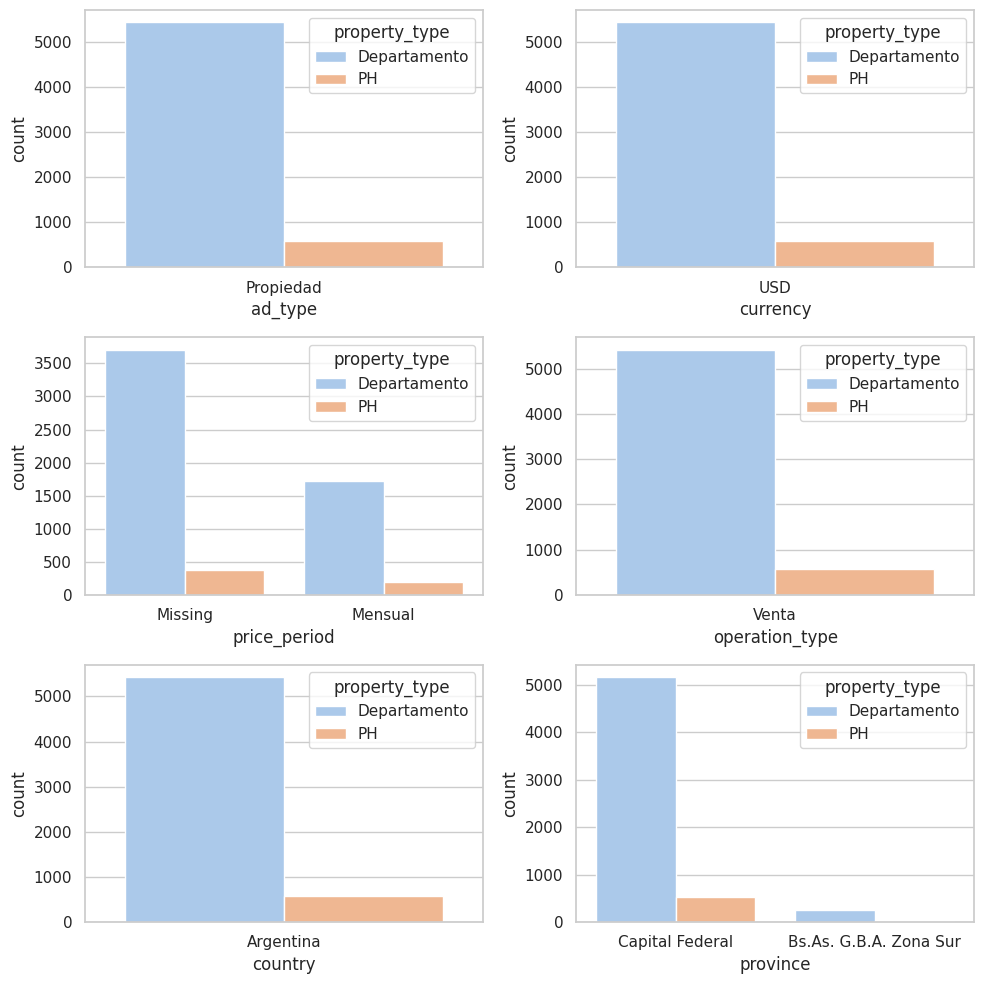

In [40]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

axes = axes.flat

hue='property_type'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(cat_cols_temp):
    sns.countplot(x=col, data=df_test.fillna("Missing"), ax=axes[i], hue=hue)
plt.tight_layout()
plt.show()

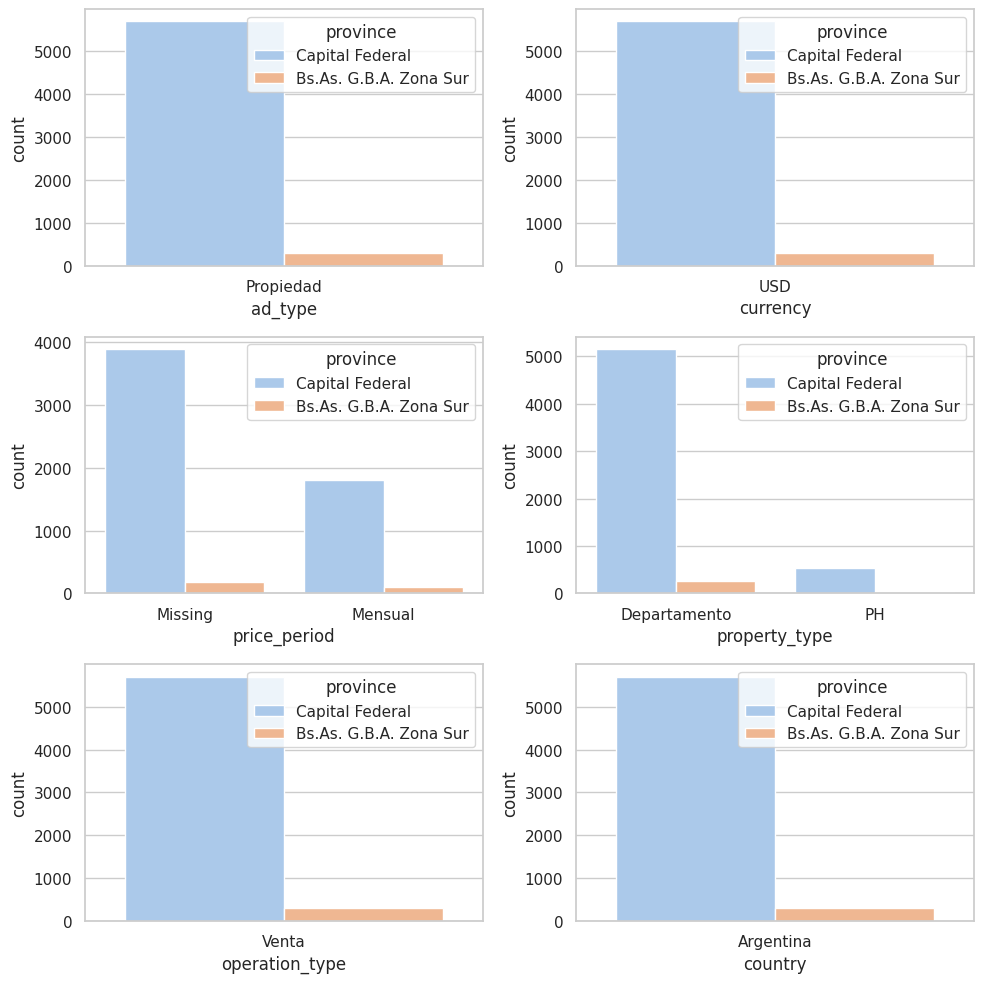

In [41]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

axes = axes.flat

hue='province'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(cat_cols_temp):
    sns.countplot(x=col, data=df_test.fillna("Missing"), ax=axes[i], hue=hue)
plt.tight_layout()
plt.show()

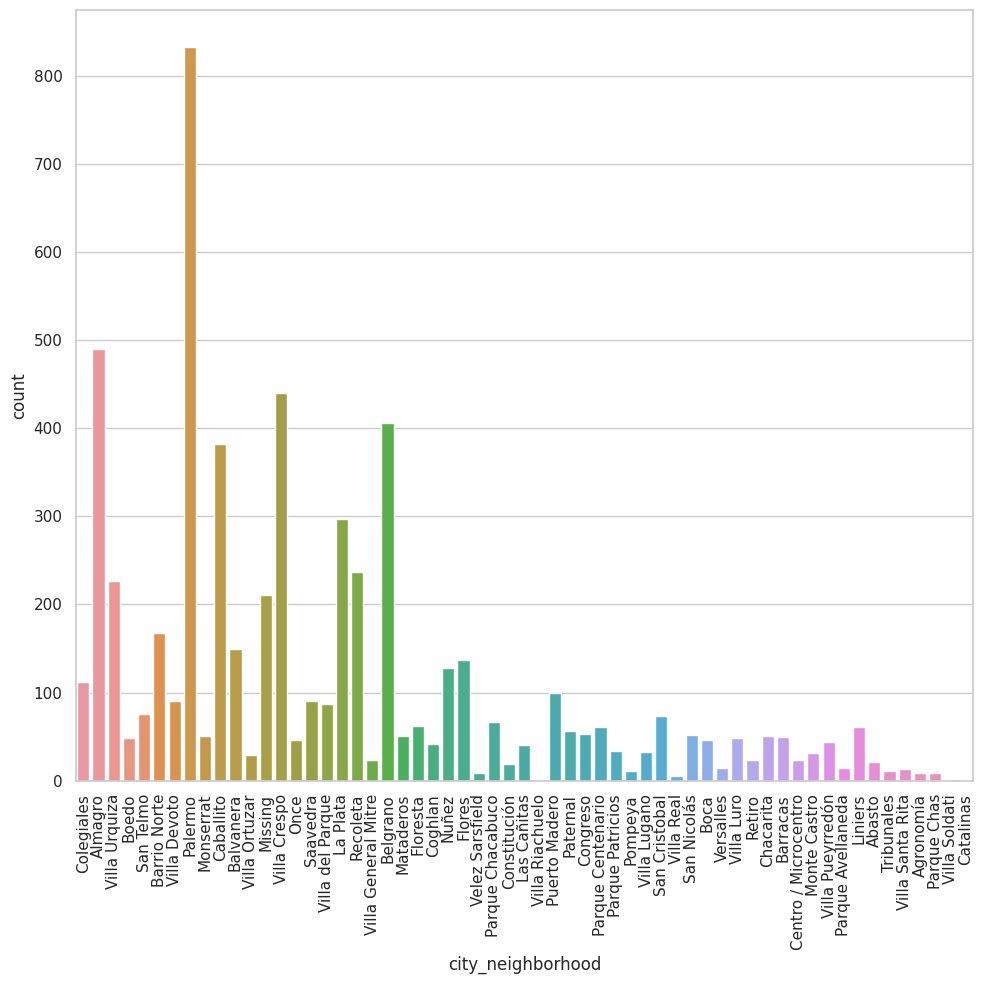

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x='city_neighborhood', data=df_test.fillna("Missing"))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

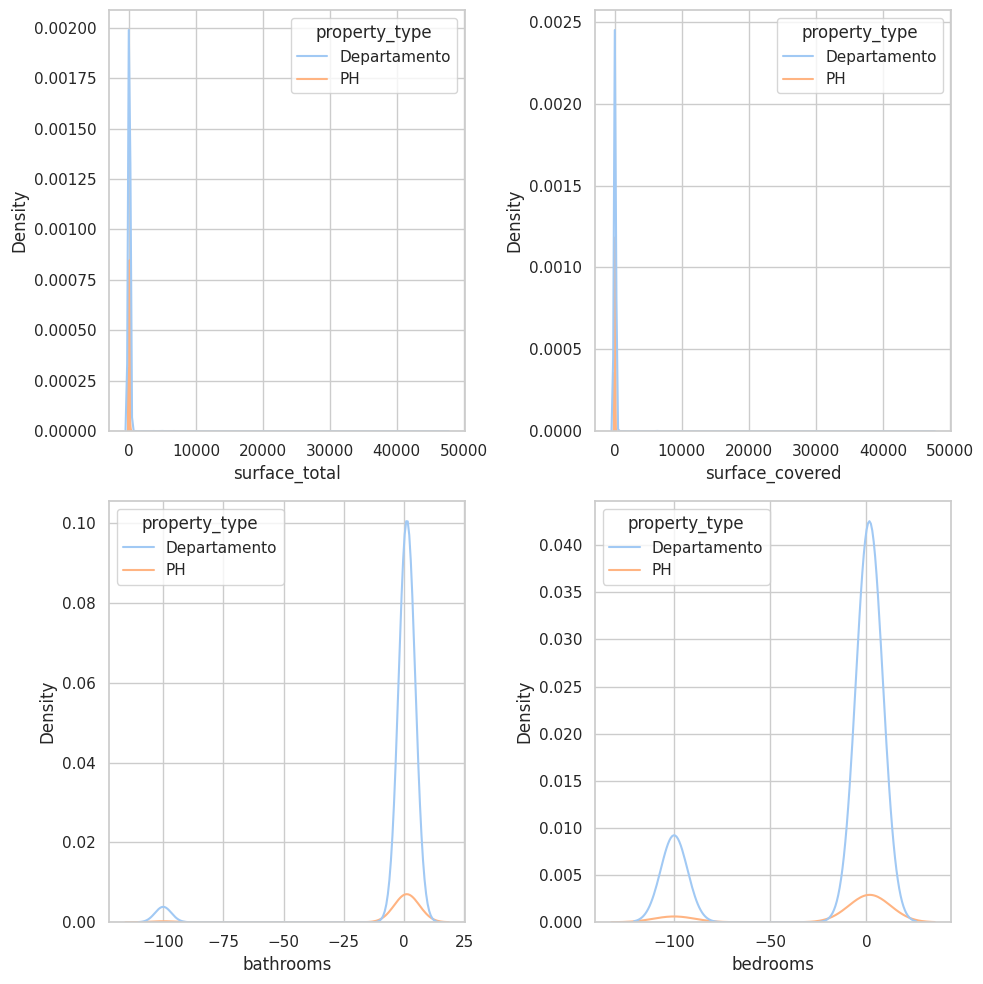

In [43]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes = axes.flat

hue='property_type'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(num_cols):
    sns.kdeplot(x=col, data=df_test.fillna(-100), ax=axes[i], hue=hue)

plt.tight_layout()
plt.show()

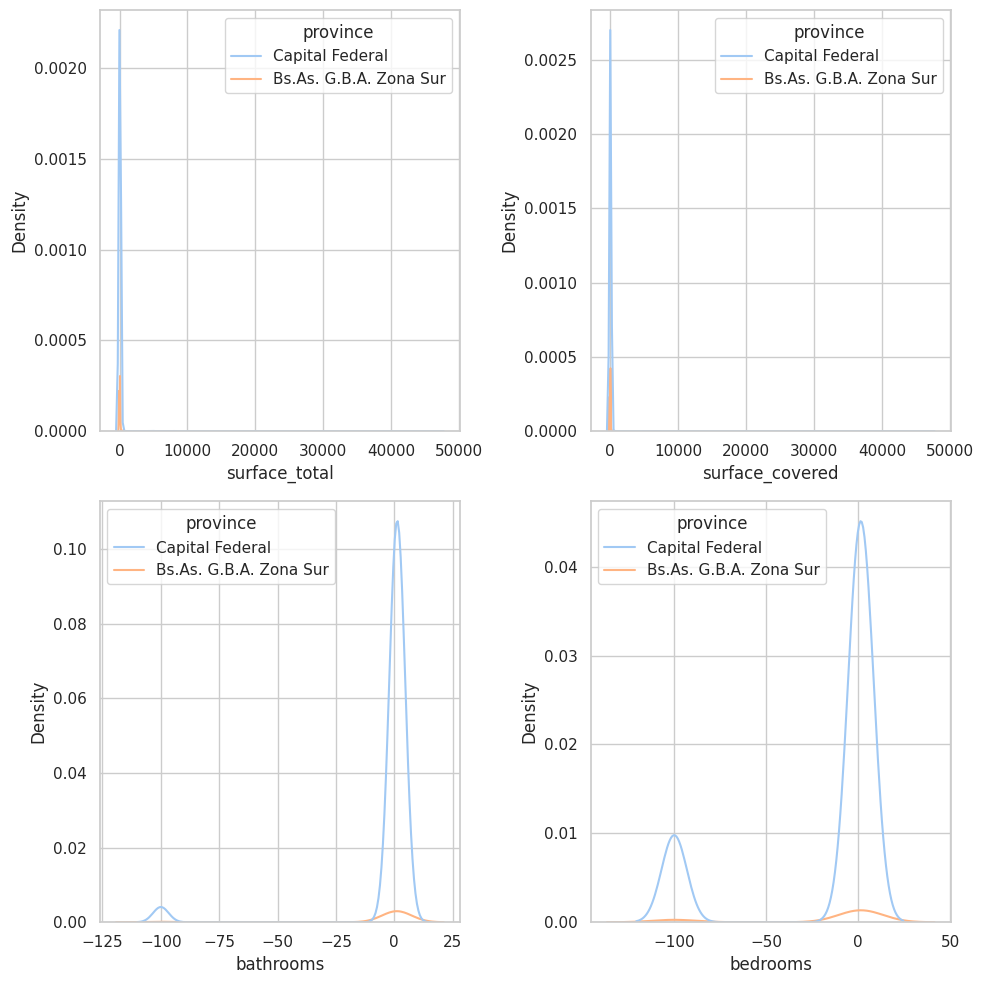

In [44]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes = axes.flat

hue='province'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(num_cols):
    sns.kdeplot(x=col, data=df_test.fillna(-100), ax=axes[i], hue=hue)

plt.tight_layout()
plt.show()

In [45]:
df_test.describe(include='all')

,ad_type,start_date,end_date,created_on,lat,lon,country,province,city_neighborhood,published_neigborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type
count,6000,6000,6000,6000,5545.000000,5544.000000,6000,6000,5789,459,6000.000000,4935.000000,5782.000000,4776.000000,4879.000000,6000,1915,6000,6000,6000,6000
unique,1,NaN,396,NaN,NaN,NaN,1,2,58,13,NaN,NaN,NaN,NaN,NaN,1,1,3892,5104,2,1
top,Propiedad,NaN,9999-12-31,NaN,NaN,NaN,Argentina,Capital Federal,Palermo,La Plata,NaN,NaN,NaN,NaN,NaN,USD,Mensual,departamento 2 ambientes venta villa crespo,excelente monoambiente divisible contrafrente ...,Departamento,Venta
freq,6000,NaN,1188,NaN,NaN,NaN,6000,5703,833,204,NaN,NaN,NaN,NaN,NaN,6000,1915,143,15,5426,6000
mean,NaN,2020-01-09 23:56:52.800000256,NaN,2020-01-09 23:56:52.800000256,-34.598131,-58.445369,NaN,NaN,NaN,NaN,2.502667,1.509220,1.275683,91.936558,77.377126,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2019-07-04 00:00:00,NaN,2019-07-04 00:00:00,-40.156235,-71.345241,NaN,NaN,NaN,NaN,2.000000,0.000000,1.000000,10.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2019-10-12 00:00:00,NaN,2019-10-12 00:00:00,-34.616927,-58.460256,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,48.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2020-01-10 00:00:00,NaN,2020-01-10 00:00:00,-34.600546,-58.433935,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,60.000000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020-04-14 00:00:00,NaN,2020-04-14 00:00:00,-34.583789,-58.410085,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,79.000000,68.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2020-07-27 00:00:00,NaN,2020-07-27 00:00:00,-27.358836,-55.893583,NaN,NaN,NaN,NaN,3.000000,5.000000,6.000000,47360.000000,47360.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
lat, lon = df_test.iloc[0]["lat"], df_test.iloc[0]["lon"]
print(lat, lon)

-34.5736231 -58.4423994


In [47]:
df_test.iloc[0][:]

ad_type                                                          Propiedad
start_date                                             2019-11-29 00:00:00
end_date                                                        9999-12-31
created_on                                             2019-11-29 00:00:00
lat                                                             -34.573623
lon                                                             -58.442399
country                                                          Argentina
province                                                   Capital Federal
city_neighborhood                                               Colegiales
published_neigborhood                                                 None
rooms                                                                  3.0
bedrooms                                                               2.0
bathrooms                                                              2.0
surface_total            

In [48]:
geolocator = Nominatim(user_agent="Bing")
location = geolocator.reverse(str(lat) + "," + str(lon))
location.raw["address"]

{'house_number': '2595',
 'road': 'Jorge Newbery',
 'suburb': 'Colegiales',
 'city': 'Buenos Aires',
 'ISO3166-2-lvl8': 'AR-C',
 'state_district': 'Comuna 13',
 'state': 'Ciudad Autónoma de Buenos Aires',
 'ISO3166-2-lvl4': 'AR-C',
 'postcode': 'C1426AAE',
 'country': 'Argentina',
 'country_code': 'ar'}

In [19]:
df_test[df_test["province"].isin(["Bs.As. G.B.A. Zona Sur"])].head(5)

,ad_type,start_date,end_date,created_on,lat,lon,country,province,city_neighborhood,published_neigborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
168773,Propiedad,2020-01-19,9999-12-31,2020-01-19,-34.851046,-58.069133,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,Villa Elisa,3.0,2.0,2.0,NaN,NaN,USD,None,Venta de Duplex 2 dormitorios Villa Elisa 132 ...,Venta de Duplex 2 dormitorios Villa Elisa&nbsp...,Departamento,Venta
960442,Propiedad,2020-05-30,2020-06-15,2020-05-30,-34.931354,-57.996873,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,3.0,2.0,1.0,80.0,67.0,USD,Mensual,Departamento - Los Hornos,"Departamento en planta baja, en impecable est...",Departamento,Venta
247473,Propiedad,2020-01-03,2020-09-09,2020-01-03,-34.922167,-57.960445,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,2.0,NaN,1.0,50.0,50.0,USD,Mensual,Departamento - La Plata,7 casi esq 70. Departamento ubicado en el 2° p...,Departamento,Venta
638111,Propiedad,2020-02-21,2020-02-22,2020-02-21,-34.912500,-57.947296,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,2.0,1.0,1.0,41.0,41.0,USD,None,OPORTUNIDAD DEPARTAMENTO DOS AMBIENTES PREMIUN...,Impactante Departamento de dos Ambientes a sol...,Departamento,Venta
127470,Propiedad,2020-07-07,9999-12-31,2020-07-07,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,3.0,2.0,1.0,NaN,62.0,USD,Mensual,PH - La Plata,Venta de ph a reciclar en calle 9 entre 60 y 6...,PH,Venta


In [20]:
idx = 127470 #, 960442 , 168773

In [21]:
lat, lon = df_test[df_test.index == idx].iloc[0][['lat', "lon"]]
print(lat, lon)

nan nan


In [22]:
title = df_test[df_test.index == idx].iloc[0]['title']
print(title)

PH - La Plata


In [23]:
desc = df_test[df_test.index == idx].iloc[0]['description']
print(desc)

Venta de ph a reciclar en calle 9 entre 60 y 61 de dos dormitorios , cocina integrada , baño completo y patio . No paga expensas .<br>Mts totales 83<br><br><br>Comunicate: +54-9-221-501-2253<br> Calle 57 #632 entre 7 y 8 • Piso 8 B1900BMZ La Plata, BA // ARG<br>La Plata .<br>.<br>Martillero Responsable Mauro Perri<br>C.D.C.P.D.J.L.P 7190<br>.<br>.<br>.<br>En cumplimiento de las normas legales aplicables, informamos que los Agentes NO ejercen el Corretaje Inmobiliario.<br>Todas las operaciones inmobiliarias son concluidas por los Corredores Matriculados responsables en cada oficina. @ La Plata, Buenos Aires


In [24]:
province = df_test[df_test.index == idx].iloc[0]['province']
print(province)

Bs.As. G.B.A. Zona Sur


In [25]:
location = geolocator.geocode(title.replace("PH - ", "") + " Buenos Aires")
print(location.raw)
print(location.address)
print((location.latitude, location.longitude))

{'place_id': 298555020, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 3266014, 'boundingbox': ['-34.9539303', '-34.8875541', '-57.9940921', '-57.9131672'], 'lat': '-34.9206797', 'lon': '-57.9537638', 'display_name': 'La Plata, Partido de La Plata, Buenos Aires, Argentina', 'class': 'boundary', 'type': 'administrative', 'importance': 0.9666550198799103, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}
La Plata, Partido de La Plata, Buenos Aires, Argentina
(-34.9206797, -57.9537638)


In [ ]:
geolocator = Nominatim(user_agent="Bing")
location = geolocator.reverse(str(lat) + "," + str(lon))
location.raw["address"]

In [112]:
df = df_test.copy()
df = df.reset_index(drop=False)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="lon", 
                        hover_name="title", 
                        hover_data=["id"],
                        color="l2",
                        color_continuous_scale=color_scale,
                        zoom=10, 
                        height=800,
                        width=1600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
df_test.loc[df_test.index == 117439]["description"].values

array(['PROMOCION POR TIEMPO LIMITADO- 500mt Mar en el Centrito de la Playa Ingleses-FLORIANÓPOLIS-BRAZIL-Apartamento 2Dormitorios con VISTA AL MAR-Financia Compania Constructora.Emprendimiento en construccion que ya empezó,y que tiene previsión de entrega en Septiembre de 2021. Edificio con ascensor,playground,salón de fiesta, espacio gourmet, espacio Kids, fitness,playground,piscina,salón de juegos, salas comerciales en Planta Baja,gas central,agua caliente,portero electrónico.Apartamento 2 Dormitorios sendo 1 Suite, con posición en el edificio con Vista al Mar y localizado en el Segundo Piso ,cocina, living,2 baños,area de servicio,balcón con parrilla privada,garaje privado para 1 auto. Area Util:68,16 Area Total:116,63m2.VALOR :R 361.503 Reales que equivale actualmente a aproximadamente U 90.400 Dolares,y que puede comprar con Entrada de U 10.000 Dolares, y el Valor Restante en 28 Cuotas Mensuales - KP16310 - Publicado por  '],
      dtype=object)

In [92]:
df_test[df_test['lat'].isna() & df_test['lon'].isna() & df_test['city_neighborhood'].isna()]

,ad_type,start_date,end_date,created_on,lat,lon,country,province,city_neighborhood,published_neigborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
801187,Propiedad,2020-02-12,9999-12-31,2020-02-12,NaN,NaN,Argentina,Capital Federal,None,None,2.0,1.0,1.0,NaN,NaN,USD,None,1 dormitorio - pichincha rosario,venta departamento de 1 dormitorio \n\nubicaci...,Departamento,Venta
250522,Propiedad,2020-01-16,9999-12-31,2020-01-16,NaN,NaN,Argentina,Capital Federal,None,None,2.0,1.0,1.0,NaN,NaN,USD,None,depto ph 2 ambientes sin gastos en planta alta...,living comedor con cocina incorporada con barr...,PH,Venta
395266,Propiedad,2020-01-07,9999-12-31,2020-01-07,NaN,NaN,Argentina,Capital Federal,None,None,2.0,1.0,1.0,NaN,NaN,USD,None,venta departamento de 2 ambientes en el centro...,luminoso y muy buen estado!!!\nexcelente depar...,Departamento,Venta
652257,Propiedad,2019-11-12,2020-08-13,2019-11-12,NaN,NaN,Argentina,Capital Federal,None,None,3.0,2.0,3.0,NaN,NaN,USD,None,"departamento en venta en belgrano, capital fed...",venta de departamento tipo duplex 3 ambientes ...,Departamento,Venta
71525,Propiedad,2019-12-17,2020-02-18,2019-12-17,NaN,NaN,Argentina,Capital Federal,None,None,2.0,1.0,1.0,NaN,NaN,USD,None,en venta - corrientes 336,muy lindo departamento en venta con cochera.\n...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450257,Propiedad,2020-01-21,9999-12-31,2020-01-21,NaN,NaN,Argentina,Capital Federal,None,None,2.0,1.0,2.0,NaN,NaN,USD,None,2 ambientes con balcon corrido. la perla.,cocina separada por barra desayunadora. amplio...,Departamento,Venta
110163,Propiedad,2020-01-22,9999-12-31,2020-01-22,NaN,NaN,Argentina,Capital Federal,None,None,3.0,2.0,2.0,NaN,NaN,USD,None,venta increíble 3 ambientes a estrenar con coc...,"bonjo iv, plaza mitre\nexcelente departamento ...",Departamento,Venta
119655,Propiedad,2020-01-06,9999-12-31,2020-01-06,NaN,NaN,Argentina,Capital Federal,None,None,3.0,2.0,1.0,NaN,NaN,USD,None,casa en ph,"vendemos muy bien ubicada, propiedad en ph sob...",PH,Venta


In [49]:
all_neigborhoods = []
for i in df_test["city_neighborhood"].dropna().unique():
    for j in i.split("/"):
        all_neigborhoods.append(j.strip())

for i in df_test["published_neigborhood"].dropna().unique():
    for j in i.split("/"):
        all_neigborhoods.append(j.strip())

In [50]:
len(all_neigborhoods)

72

In [52]:
def search_neigborhoods(x, y):
    for i in all_neigborhoods:
        if i.lower() in x.lower():
            return i
        elif i.lower() in y.lower():
            return i
    return np.nan

In [53]:
'belgrano' in 'Departamento en Venta en Belgrano,'.lower()

True

In [54]:
"Belgrano" in all_neigborhoods

True

In [55]:
df_test["Imputed_Neigborhood"] = df_test[["title", "description"]].apply(lambda x: search_neigborhoods(*x),axis=1)

In [56]:
df_test

,ad_type,start_date,end_date,created_on,lat,lon,country,province,city_neighborhood,published_neigborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,Imputed_Neigborhood
id,,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-34.573623,-58.442399,Argentina,Capital Federal,Colegiales,None,3.0,2.0,2.0,NaN,NaN,USD,None,departamento venta belgrano capital federal,"sup escritura 96,47 m2 cubiertos 61 m2 descubi...",Departamento,Venta,Belgrano
192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-34.606620,-58.430493,Argentina,Capital Federal,Almagro,None,3.0,2.0,2.0,77.0,67.0,USD,None,departamento 3 ambientes venta almagro,excelente departamento ambientes amplio modern...,Departamento,Venta,Almagro
238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-34.574123,-58.491760,Argentina,Capital Federal,Villa Urquiza,None,2.0,NaN,1.0,60.0,55.0,USD,None,andonaegui 2600 4 ° departamento venta,excelente 3 ambientes frente balcón vista abie...,Departamento,Venta,Villa Urquiza
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-34.631770,-58.420737,Argentina,Capital Federal,Boedo,None,2.0,1.0,1.0,74.0,47.0,USD,None,ph venta boedo 2 amb patio,corredor responsable marcelo trujillo cpi 6...,PH,Venta,Boedo
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-34.607225,-58.429983,Argentina,Capital Federal,Almagro,None,3.0,2.0,1.0,66.0,64.0,USD,None,venta 3 ambientes almagro balcón amenities,corredor responsable marcelo trujillo cucicba ...,Departamento,Venta,Almagro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323956,Propiedad,2020-04-27,2020-05-08,2020-04-27,-34.590528,-58.419836,Argentina,Capital Federal,Palermo,Palermo Soho,3.0,2.0,2.0,82.0,65.0,USD,Mensual,departamento 3 ambientes venta palermo soho,excelente departamento ambientes estrenar cali...,Departamento,Venta,Palermo
519391,Propiedad,2019-12-14,2019-12-23,2019-12-14,-34.608248,-58.421008,Argentina,Capital Federal,Almagro,None,2.0,1.0,1.0,52.0,48.0,USD,None,departamento 2 ambientes venta almagro,hermoso 2 ambientes frente balcon aterrazado p...,Departamento,Venta,Almagro
80048,Propiedad,2019-07-29,2019-10-31,2019-07-29,-34.613052,-58.433235,Argentina,Capital Federal,Caballito,None,3.0,NaN,2.0,76.0,70.0,USD,Mensual,venta departamento 3 amb parque rivadavia caba...,edificio < br > green urbano categoría ...,Departamento,Venta,Caballito


In [57]:
df_test['Imputed_Neigborhood'].isna().sum()

1348

In [58]:
df_test['Imputed_Neigborhood'] = df_test['Imputed_Neigborhood'].fillna(df_test['city_neighborhood'])
df_test['Imputed_Neigborhood'] = df_test['Imputed_Neigborhood'].fillna(df_test['published_neigborhood'])

In [59]:
df_test['Imputed_Neigborhood'].isna().sum()

139

In [93]:
import re

In [62]:
import swifter

In [116]:
df_test["title"] = df_test["title"].swifter.apply(replace_number_words_with_ordinals)

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

In [117]:
df_test["description"] = df_test["description"].swifter.apply(replace_number_words_with_ordinals)

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

In [118]:
df_test.iloc[1][:]

ad_type                                                          Propiedad
start_date                                             2020-06-05 00:00:00
end_date                                                        2020-06-08
created_on                                             2020-06-05 00:00:00
lat                                                              -34.60662
lon                                                             -58.430493
country                                                          Argentina
province                                                   Capital Federal
city_neighborhood                                                  Almagro
published_neigborhood                                                 None
rooms                                                                  3.0
bedrooms                                                               2.0
bathrooms                                                              2.0
surface_total            

In [106]:
numbers_rooms = list(range(0,100))
# pattern = r"(?:\b|\d+)\s*(?!bedrooms)(?:%s)\s*(?:amb|ambiente|ambientes)\b" % "|".join(number_words.keys())



def search_ambientes(text):
# for i in df_test["description"].dropna().sample(100):
    # print(i)
    pattern = r"\b(\d+)\s*(?:amb|ambiente|ambientes|dorm|dormitorio|dormitorios)\b"
    nums = re.findall(pattern, text)
    if nums:
        # print(nums[0] if len(nums)>0 else np.nan)
        # print("\n")
        return int(nums[0])
    else:
        return np.nan

In [107]:
df_test["imputed_ambientes"] = df_test["title"].swifter.apply(search_ambientes)
df_test["imputed_ambientes"] = df_test["imputed_ambientes"].fillna(df_test["description"].swifter.apply(search_ambientes))

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

In [108]:
df_test["imputed_ambientes"].isna().sum()

725

In [109]:
df_test["imputed_ambientes"] = df_test["imputed_ambientes"].fillna(df_test["rooms"])

In [110]:
df_test["imputed_ambientes"].isna().sum()

0

In [114]:
df_test["imputed_ambientes"].value_counts(sort=True, ascending=True)

imputed_ambientes
6.100000e+01       1
6.000000e+00       1
1.561534e+09       1
5.800000e+01       1
1.500000e+01       1
1.000000e+03       1
0.000000e+00       1
5.000000e+01       1
8.000000e+01       1
5.000000e+00       6
4.000000e+00      87
1.000000e+00     204
3.000000e+00    2819
2.000000e+00    2875
Name: count, dtype: int64

In [134]:
df_test.sort_values(by=["imputed_ambientes"], ascending=False).iloc[0]["description"]

'hermoso departamento terraza impresionantes dimensiones polo ubicado arevalo polo excelente ubicación polo gastronómico barrio visitarlo contactar marta 1561534481 dormitorio suite vestidor amplias dimensiones.toilletes recepción cocina americana detalles categoría living super amplio luminoso terraza parrilla vista polo imperdible!!!!1 cochera fijaammenities pileta sum parrilas gym sauna seguridad 24hrs.digno coordinar visita contacto celular 1561534481 mensajes whatsapp facebook instagram onebrokerstasaciones profesionales matricula 4118 colegio profesional inmobiliario'

In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 556713 to 757314
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ad_type                6000 non-null   object        
 1   start_date             6000 non-null   datetime64[ns]
 2   end_date               6000 non-null   object        
 3   created_on             6000 non-null   datetime64[ns]
 4   lat                    5545 non-null   float64       
 5   lon                    5544 non-null   float64       
 6   country                6000 non-null   object        
 7   province               6000 non-null   object        
 8   city_neighborhood      5789 non-null   object        
 9   published_neigborhood  459 non-null    object        
 10  rooms                  6000 non-null   float64       
 11  bedrooms               4935 non-null   float64       
 12  bathrooms              5782 non-null   float64       
 13  s

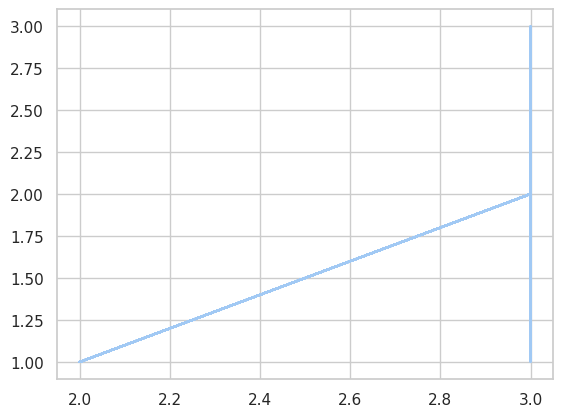

In [136]:
df_test['bedrooms'] = df_test['bedrooms'].fillna(df_test['rooms'] - 1)

<Axes: xlabel='rooms', ylabel='bedrooms'>

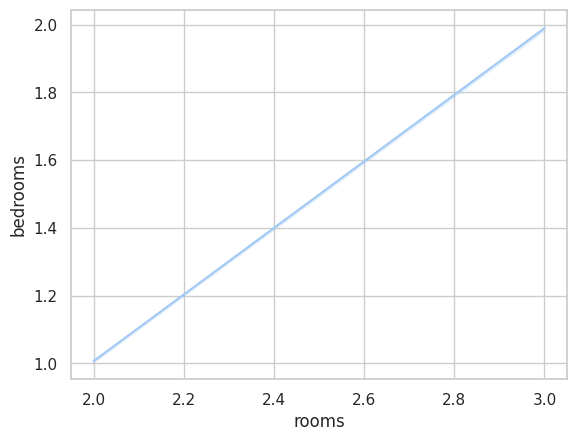

In [143]:
sns.lineplot(x='rooms', y='bedrooms', data=df_test)

In [131]:
df_test[df_test["imputed_ambientes"].isna()]

,ad_type,start_date,end_date,created_on,lat,lon,country,province,city_neighborhood,published_neigborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,Imputed_Neigborhood,imputed_ambientes
id,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
numbers_rooms = list(range(0,100))
# pattern = r"(?:\b|\d+)\s*(?!bedrooms)(?:%s)\s*(?:amb|ambiente|ambientes)\b" % "|".join(number_words.keys())
pattern = r"\b(\d+)\s*(?:amb|ambiente|ambientes|dorm|dormitorio|dormitorios)\b"


for i in df_test["description"].dropna().sample(100):
    print(i)
    nums = re.findall(pattern, i)
    if nums:
        print(nums[0] if len(nums)>0 else np.nan)
        print("\n")